In [2]:
import plotly.graph_objects as go
import numpy as np
from scipy.integrate import solve_ivp

### Modelo de Dinâmica Populacional
- Modelo de Gompertz

O modelo de Gompertz é dado pelo PVI:

$$\begin{cases}  \dfrac{dP}{dt} = rP \displaystyle \ln{\left( \frac{K}{P} \right)} \\\\
P(0) = P_0
\end{cases}$$

onde
- $P(t)$ é o número de indivíduos no tempo $t$;
- $r$ é a taxa de crescimento intrínseco;
- $K$ é a capacidade de carga, ou seja, o número máximo de indivíduos que o ambiente
suporta.

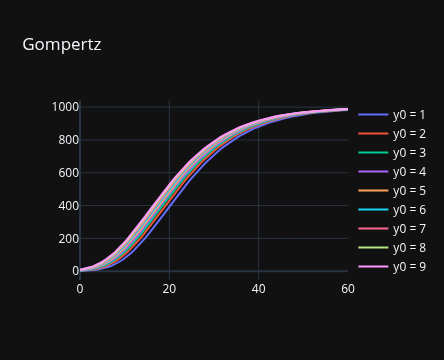

In [7]:
#Definindo a Modelo
K = 1000
r = 0.1
def Gomp(t,P):
    return r*P*np.log(K/P)
    
# Vetor de tempo
t = np.linspace(0,60,100)

# Figura
fig = go.Figure()

# Definindo as condições inicias
for yi in range(1,10):
    sol = solve_ivp(Gomp, [0,60], [yi], t_eval=t)
    fig.add_trace(go.Scatter(
        x = sol.t,
        y = sol.y[0],
        name = f"y0 = {yi}"
    ))

fig.update_layout(
    title="Gompertz",
    height=500,
    template="plotly_dark")
fig.show()

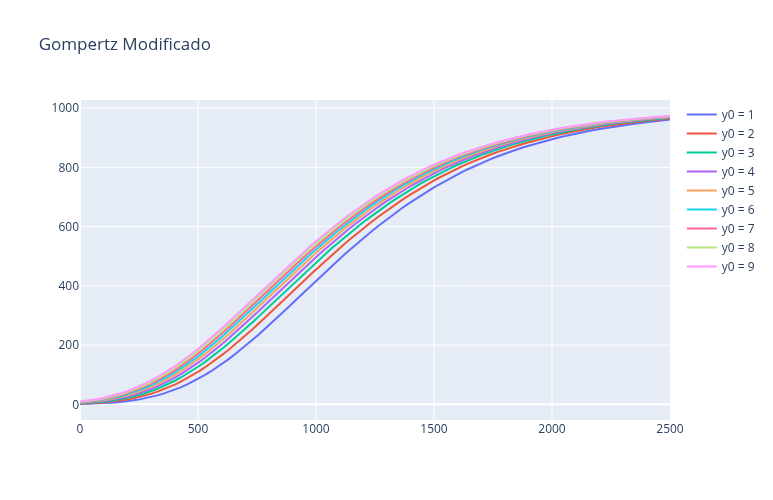

In [9]:
# Versão Modificada
r = 0.76
def Gomp_Mod(t,P):
    return (r*(np.exp(1))*np.log(K/P)*P)/K

t = np.linspace(0,2500,100)
fig = go.Figure()

for yi in range(1,10):
    sol = solve_ivp(Gomp_Mod, [0,2500], [yi], t_eval=t)
    fig.add_trace(go.Scatter(
        x = sol.t,
        y = sol.y[0],
        name=f"y0 = {yi}"
    ))

fig.update_layout(
    title= "Gompertz Modificado",
    height=500,
    template="plotly_dark")
fig.show()